# Casusopdracht | UFO

### Onderzoeksvragen

---

**Onderzoeksvraag 1**
In hoeverre is er een verband tussen de vorm van de UFO en het land van de waarneming?
*    Interactive visualisatie


**Onderzoeksvraag 2**
Wat is het verband tussen het aantal waarnemingen per 1000 inwoners in de VS en het jaartal?
*    Correlatieonderzoek
*    Supervised machine learning
*    Externe dataset (Link: https://en.wikipedia.org/wiki/Demographic_history_of_the_United_States)


**Onderzoeksvraag 3**
Hoe beinvloed de tijd van het jaar de hoeveelheid waarnemingen?
*    Unsupervised machine learning


**Hypothese Z-toets**
In een artikel in een Duits dagblad werd onlangs gesteld dat Duitsers met interesse in het bovenmenselijke ondergemiddeld actief zijn op internet (ten opzichte van andere nationaliteiten), omdat er een grote UFO-vereniging bestaat die de noodzaak voor online delen van informatie wegneemt.
Onderzoek met de dataset of Duitsers minder tijd op de website doorbrengen dan gemiddeld (zie de volledige dataset als populatie). Neem als betrouwbaarheid 90%.

# Data collection

---

In dit onderdeel lopen we door de data die wij hebben verzameld en gaan gebruiken in ons Notebook.
Wij gebruiken de meegegeven dataset die de UFO waarnemingen bevat en een externe dataset met de populatie van de US.

Door het gebruik van de externe dataset hopen wij een verband te kunnen leggen tussen het aantal waarnemingen (per 1000 inwoners) in de US en het jaartal.

### De UFO dataset bevat:
*    **Datetime:**<br>
    De dag en tijd waarop de waarneming plaatsvond.
*    **City:**<br>
    De stad waar de waarneming plaatsvond.
*    **State:**<br>
    De staat waar de waarneming plaatsvond.
*    **Country:**<br>
    Het land waar de waarneming plaatsvond.
*    **Shape:**<br>
    De vorm van het waargenomen object.
*    **Duration (seconds):**<br>
    De lengte in seconden van de waarneming.
*    **Duration (hours/min):**<br>
    De lengte in uren en minuten van de waarneming.<br>
    (Dit wordt niet consequent genoteerd, bijvoorbeeld 45 minutes of 1-2 hrs)
*    **Comments:**<br>
    Extra uitleg en informatie over de waarneming
*    **Date posted:**<br>
    De datum waarop de waarneming op de website is geplaatst.
*    **Latitude:**<br>
    De breedtegraad van de locatie waarop de waarneming plaatsvond.
*    **longitude:**<br>
    De lengtegraad van de locatie waarop de waarneming plaatsvond.
*    **Visit (seconds):**<br>
    De lengte in seconden van het bezoek op de website.
    
    
### De externa dataset bevat:
*    **Year:**<br>
    Het jaar.
*    **Population:**<br>
    De populatie van de US.

### Bibliotheken Importeren

---

Vervolgens importeren wij de bibliotheken die in het gehele Notebook worden gebruikt.
Numpy voor de efficientere berekeningen in python, Datetime voor het gemakkelijk werken met data, Pandas voor het weergeven en structureren van onze datasets en SciPy voor het machine learning.
Daarnaast gebruiken wij onderandere MatPlotLib en SeaBorn voor het visualiseren van onze data.

In [2]:
# data analyse bibliotheken
import numpy as np
import pandas as pd
from datetime import datetime
import scipy as sp
from scipy import stats

# visualisatie bibliotheken
import matplotlib.pyplot as plt
import seaborn as sns

# Data Processing

---

Nu gaan wij de datasets inladen in een Pandas dataframe.
Dit maakt het eenvoudig de data te tonen en vervolgens te verwerken.
Ook tonen wij de eerste 5 rijen van de data om te kijken of deze correct is ingeladen.

In [34]:
dataUfo = pd.read_csv("datasets/ufo.csv",
                index_col = 0)
dataUfo.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,visit (seconds)
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,255
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,307
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,280
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,202
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,255


En dan nogmaals hetzelfde proces, maar nu voor de populatie dataset.

In [4]:
dataPop = pd.read_csv('datasets/population.csv')
dataPop.head()

,year,population
0,1610,350
1,1620,2302
2,1630,4646
3,1640,26634
4,1650,50368


# Data cleaning

---

Om de data goed te kunnen opschonen is het van belang eerst even goed naar de data te kijken.
Dit houdt in dat we kijken naar de waarden, of belangrijker, de ontbrekende en foutieve waarden: Null en NaN.

In [5]:
# Een check om te kijken of we de datasets missende waarden bevatten.
print ("Heeft de Ufo dataset missende waarden? ", dataUfo.isnull().values.any(), '\n')
print ("Heeft de Population dataset missende waarden? ", dataPop.isnull().values.any(), '\n')

Heeft de Ufo dataset missende waarden?  True 

Heeft de Population dataset missende waarden?  False 



We kunnen hieruit concluderen dat de UFO dataset inderdaad missende waarden bevat.
Daarom gaan we de data iets beter onderzoeken om te kijken wat deze waarden daadwerkelijk zijn, wat ze zouden moeten representateren en of ze überhaupt van belang zijn.

In [25]:
# Pas de optie aan om alle rijen tonen.
pd.set_option('display.max_rows', None)

In [29]:
dataUfo.isnull().sum()

datetime                    0
city                        0
state                    7409
country                 12365
shape                    2922
duration (seconds)          2
duration (hours/min)     3019
comments                   35
date posted                 0
latitude                    0
longitude                   0
visit (seconds)             0
dtype: int64

In [27]:
# Reset de optie om alle rijen te tonen, aangezien dit een erg dure operatie is.
pd.reset_option("display.max_rows")

In [31]:
print ("In totaal missen er", dataUfo.isnull().sum().sum(), "gegevens in de UFO dataset." '\n')

In totaal missen er 25752 gegevens in de UFO dataset.



Voordat we de rijen met null-waarden verwijderen, is het van belang eerst te kijken of deze null-waarden een probleem vormen.

Ten eerste de null waarden in de kolom 'State'.
Als je erover nadenkt is het vrij logisch dat er veel rijen zonder staat bestaan: alleen de waarnemingen binnen de US hebben immers een staat.
Nu weten we dus dat we de 'State' kolom alleen nuttig kunnen gebruiken bij het eventueel visualiseren van **Onderzoeksvraag 2**, omdat deze alleen de waarnemingen binnen de US benut.

Vervolgens kijken we naar de missende waarden in de kolom 'Duration (hours/min)'.
Er missen veel waarden in deze kolom, maar dat zou geen ramp moeten zijn.
We hebben immers ook een kolom met de lengte van de waarnemingen in seconden.
Daardoor kunnen we besluiten de kolom 'Duration (hours/min)' te negeren en in plaats daarvan altijd de kolom 'Duration (seconds)' gebruiken, zou dit nodig zijn.

Ook zien we veel null-waarden in de kolommen 'Country' en 'Shape'.
Dit zijn echter belangrijke kolommen voor onze onderzoeksvragen, dus de waarnemingen die deze waarden niet bevatten zijn vrijwel nutteloos voor het beantwoorden van deze vragen.
De rijen met missende waarden in deze kolommen zullen dus verwijderd moeten worden.


Nu we in kaart hebben gebracht waar de null-waarden liggen, is het belangrijk hier iets mee te doen.
Naast het droppen van de kolom 'Duration (hours/min)' vanwege de null-waarden, zijn er nog andere kolommen die niet nuttig zijn voor het beantwoorden van onze onderzoeksvragen:
*    **Visit (seconds)**<br>
    Deze kolom geeft geen informatie over de waarneming zelf, maar over het gebruik van de website.<br>
    Niet relevant voor ons onderzoek.
*    **Comments**<br>
    Deze kolom bevat veel informatie over de waarnemingen, maar is te uitgebreid om duidelijk te categoriseren.
*    **Duration (hours/min)**<br>
    Deze kolom bevat geen waarden die relevant zijn voor het beantwoorden van onze onderzoeksvragen.
*    **Date posted**<br>
    Deze kolom geeft geen informatie over de waarneming zelf, maar over het gebruik van de website.<br>
    Niet relevant voor ons onderzoek.

In [35]:
# Drop te kolommen die niet bruikbaar zijn in ons onderzoek.
drop_list = ['visit (seconds)', 'duration (seconds)', 'comments', 'duration (hours/min)', 'date posted']
dataUfo.drop(drop_list, axis = 1, inplace = True)
dataUfo.head()

,datetime,city,state,country,shape,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,21.4180556,-157.803611


Nu gaan we nogmaals kijken hoeveel null-waarden we overhouden:

In [36]:
print ("In totaal missen er", dataUfo.isnull().sum().sum(), "gegevens in de UFO dataset." '\n')

In totaal missen er 22696 gegevens in de UFO dataset.



Dit is al een prima verbetering.
De overige null-waarden zullen per onderzoeksvraag moeten worden bekeken, omdat deze niet voor elke vraag van belang zijn.
Bijvoorbeeld de waarnemingen zonder vorm hoeven alleen verwijderd te worden voor **Onderzoeksvraag 1**, maar kunnen prima gebruikt worden voor het beantwoorden van de andere onderzoeksvragen.

### Datatypen

---

Om gemakkelijk met de data te kunnen werken, is het handig om de datatypen van de kolommen juist aan te geven.
Bijvoorbeeld 'Latitude' en 'Longitude' naar floats en 'Datetime' naar een datatime.
De overige kolommen zetten we om naar het datatype 'category', wat inhoudt dat er maar een gelimiteerd aantal opties zijn.

In [11]:
dataUfo.dtypes

datetime      object
city          object
state         object
country       object
shape         object
latitude      object
longitude    float64
dtype: object

In [43]:
# Zet datatype van latitude en longitude naar float.
dataUfo['latitude'] = pd.to_numeric(dataUfo['latitude'], errors='coerce').astype(float);
dataUfo['longitude'] = pd.to_numeric(dataUfo['longitude'], errors='coerce').astype(float);

# Zet datatype van datetime naar datetime.
dataUfo['datetime'] = pd.to_datetime(dataUfo['datetime'],
                                    format="%m/%d/%Y %H:%M",
                                   errors='coerce')

# Zet datatype van overige kolommen naar category.
dataUfo = dataUfo.astype({'city': 'category',
                        'state': 'category',
                        'country': 'category',
                        'shape': 'category'
                       })

dataUfo.dtypes

datetime     datetime64[ns]
city               category
state              category
country            category
shape              category
latitude            float64
longitude           float64
dtype: object

# Data Exploration & Analysis

---

In deze stap gaan we eerst de dataset verder analyseren.

In [45]:
print(dataUfo.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88679 entries, 0 to 88678
Data columns (total 7 columns):
datetime     87459 non-null datetime64[ns]
city         88679 non-null category
state        81270 non-null category
country      76314 non-null category
shape        85757 non-null category
latitude     88678 non-null float64
longitude    88679 non-null float64
dtypes: category(4), datetime64[ns](1), float64(2)
memory usage: 3.9 MB
None


### Opgeschoond dataframepie ufo's

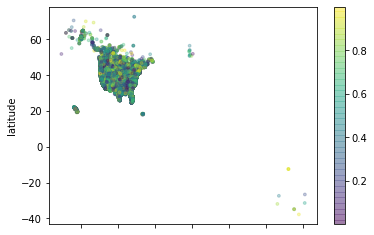

In [13]:
rng = np.random.RandomState(0)
colors = rng.rand(71279)
sizes = 10 * rng.rand()

dataUfo.plot.scatter(x='longitude', y='latitude', c=colors, s=sizes, alpha=0.3, cmap='viridis')



### USA population en jaartal vanaf 1940

In [14]:
dataPop = dataPop[dataPop['year'] >= 1940]
dataPop

,year,population
33,1940,132164569
34,1950,151325798
35,1960,179323175
36,1970,203211926
37,1980,226545805
38,1990,248709873
39,2000,281421906
40,2010,308745538
41,2020,332639000


#### Visualiseren

Text(0, 0.5, 'Bevolking in hondermiljoenen')

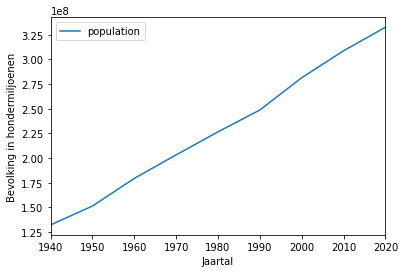

In [15]:
ax = dataPop.plot(x='year', y='population')
ax.set_xlabel('Jaartal')
ax.set_ylabel('Bevolking in hondermiljoenen')

## Wat is het verband tussen het aantal waarnemingen per 1000 inwoners in de VS en het jaartal?

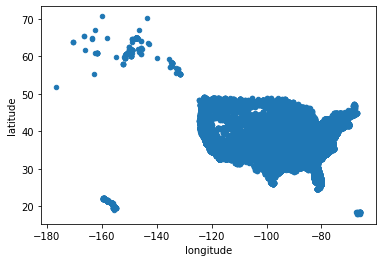

In [16]:
dataUfo = dataUfo[dataUfo.country == 'us']
dataUfo.plot.scatter(x='longitude', y='latitude')